# Multi Class Classification (KNN)


**Dataset:Glass Identification Database**

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

**Q1: Why you want to apply Classification on selected dataset? Discuss full story behind dataset.**

Ans: As dataset Contains many Columns such as 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'.Among them Outcome Column is one dependent variable.Which indicates that the 7 different types of glasses.

So here the output or target value will be seven differnt types of outcome. so it is a multi class classification problem.

So here we can use K- nearest neighbour classification for Multiclass class Classification.

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. 

In [11]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ClassificationReport
%matplotlib inline

In [13]:
glass=pd.read_csv("glass.csv")

In [14]:
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

**Q2: How many total observations in data?**

Ans: 214 rows × 10 columns

**Q3: How many independent variables?**

Ans: There are total 10 columns out of which 9 columns independent  variable.Here, Except 'Type' Column all other columns are independent.

**Q4: Which is dependent variable?**

Ans: 'Type' is dependent variable which is indicating that the the 7 different types of glasses.


In [15]:
feature_cols=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
x=glass[feature_cols]
y=glass.Type

**Q5: Which are most useful variable in estimation? Prove using correlation.**

Ans: Here, data has only 9 independent variable which has linear correlation with dependent variable.

If there are more than one independent variable, not all independent variables contributes equally in estimation of dependent variable. This can be quatified using correlation between dependent and independent variable.

corr function is sklearn can be used to find correlation between variables. We can find correlation of each independent variable with dependent vatiable using loop, store them in a list/dataframe, sort them and finally decide which varible to use in delveloping model.

In [16]:
glass.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.744993  
Al    0.479404 -0.074402  0.598829  
Si   -0.102151 -0.094201  0.151565  
K    -0.042618 -0.007719 -0.010054  
Ca   -0.112841  0.124968  0.000952  
Ba    1.000000 -0.058692  0.575161  
Fe   -0.058692  1.000000 -0.188278  
Type  0.575161 -0.188278  1.000000

**Q6: Quantify goodness of your model and discuss steps taken for improvement.**

Ans:  Goodness of the model can be defined by accuracy of model for different value of k.

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(x_train, y_train).predict(x_test)
print ("KNeighbors accuracy score : ",accuracy_score(y_test, y_pred))

KNeighbors accuracy score :  0.6296296296296297


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


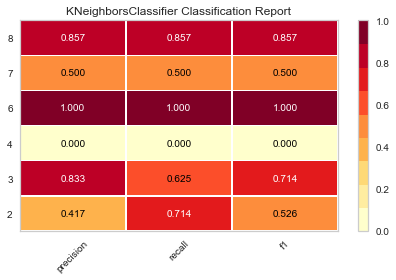

In [19]:
visualizer = ClassificationReport(neigh, classes=['1','2','3','4','5','6','7','8'])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
g = visualizer.poof() 

In [20]:
neigh1 = KNeighborsClassifier(n_neighbors=5)
y_pred = neigh1.fit(x_train, y_train).predict(x_test)
print ("KNeighbors accuracy score : ",accuracy_score(y_test, y_pred))

KNeighbors accuracy score :  0.6481481481481481


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\jay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


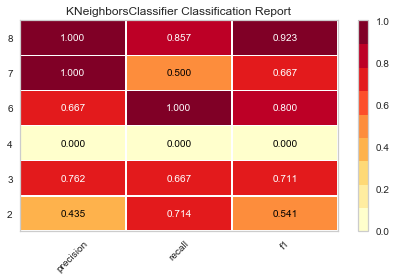

In [21]:
visualizer = ClassificationReport(neigh1, classes=['1','2','3','4','5','6','7','8'])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
g = visualizer.poof() 

**Q7: Can we use KNN for regression also? Why / Why not?**

Ans: KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that ID11 has height and age similar to ID1 and ID5, so the weight would also approximately be the same.

**Q8: Discuss drawbacks of algorithms such as KNN.**

Ans: The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.